# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

**1.1 Задаем параметры соединения с базой данный и выводим список доступных таблиц**

In [68]:
import psycopg2 as ps2
import pandas as pd
import numpy as np

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}

#Устанавливаем соединение
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

# Получаем имена таблиц из базы
sql_str = """SELECT table_name FROM information_schema.tables WHERE table_schema='public';"""
cursor.execute(sql_str)
tables_data = [i[0] for i in cursor.fetchall()]

print(f'Какие таблицы содержатся в базе данных: \n {tables_data}')

cursor.close()
conn.close()

Какие таблицы содержатся в базе данных: 
 ['hr_dataset', 'production_staff', 'male', 'female', 'recruiting_costs', 'hr_dataset_view', 'numb_of_hire', 'numb_of_terms', 'salary_grid', 'days_work', 'show_functions', 'abu_pay', 'abupay1', 'share_employee_source', 'tmpDB', 'abupay']


**1.2 Для каждой из таблиц hr_dataset, production_staff, recruiting_costs, salary_grid выводим список имен столбцов, первые три 
строки, а также сформируем для каждой из таблиц датафрейм (для удобства отображения)**

In [69]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT * FROM hr_dataset LIMIT 3;"""
cursor.execute(sql_str)

print('Имена столбцов таблицы  hr_dataset: \n\n')
print([i.name for i in cursor.description])
print('\n\n')
print('Первые три строки таблицы hr_dataset:\n\n')
[print(i, '\n') for i in cursor.fetchall()]

hr_dataset = pd.read_sql_query(sql_str, conn)
cursor.close()
conn.close()
hr_dataset

Имена столбцов таблицы  hr_dataset: 


['id', 'Employee Name', 'Employee Number', 'marriedid', 'maritalstatusid', 'genderid', 'empstatus_id', 'deptid', 'perf_scoreid', 'age', 'Pay Rate', 'state', 'zip', 'dob', 'sex', 'maritaldesc', 'citizendesc', 'Hispanic/Latino', 'racedesc', 'Date of Hire', 'Days Employed', 'Date of Termination', 'Reason For Term', 'Employment Status', 'department', 'position', 'Manager Name', 'Employee Source', 'Performance Score']



Первые три строки таблицы hr_dataset:


(1, 'Brown, Mia', 1103024456, 1, 1, 0, 1, 1, 3, 30, 28.5, 'MA', 1450, datetime.date(1987, 11, 24), 'Female', 'Married', 'US Citizen', 'No', 'Black or African American', datetime.date(2008, 10, 27), 3317, None, 'N/A - still employed', 'Active', 'Admin Offices', 'Accountant I', 'Brandon R. LeBlanc', 'Diversity Job Fair', 'Fully Meets') 

(2, 'LaRotonda, William  ', 1106026572, 0, 2, 1, 1, 1, 3, 34, 23.0, 'MA', 1460, datetime.date(1984, 4, 26), 'Male', 'Divorced', 'US Citizen', 'No', 'Black or Afric

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets


In [70]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT * FROM production_staff LIMIT 3;"""
cursor.execute(sql_str)

print('Имена столбцов таблицы  production_staff: \n\n')
print([i.name for i in cursor.description])
print('\n\n')
print('Первые три строки таблицы production_staff:\n\n')
[print(i, '\n') for i in cursor.fetchall()]

production_staff = pd.read_sql_query(sql_str, conn)
cursor.close()
conn.close()
production_staff

Имена столбцов таблицы  production_staff: 


['id', 'Employee Name', 'Race Desc', 'Date of Hire', 'TermDate', 'Reason for Term', 'Employment Status', 'Department', 'Position', 'Pay', 'Manager Name', 'Performance Score', 'Abutments/Hour Wk 1', 'Abutments/Hour Wk 2', 'Daily Error Rate', '90-day Complaints']



Первые три строки таблицы production_staff:


(1, 'Albert, Michael  ', 'White', datetime.date(2011, 8, 1), None, 'N/A - still employed', 'Active', 'Production       ', 'Production Manager', '$54.50', 'Elisa Bramante', 'Fully Meets', 0, 0, 0, 0) 

(2, 'Bozzi, Charles', 'Asian', datetime.date(2013, 9, 30), datetime.date(2014, 8, 7), 'retiring', 'Voluntarily Terminated', 'Production       ', 'Production Manager', '$50.50', 'Elisa Bramante', 'Fully Meets', 0, 0, 0, 0) 

(3, 'Butler, Webster  L', 'White', datetime.date(2016, 1, 28), None, 'N/A - still employed', 'Active', 'Production       ', 'Production Manager', '$55.00', 'Elisa Bramante', 'Exceeds', 0, 0, 0, 0) 



,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0


In [71]:
#Последние две таблицы содержат небольшое число строк, поэтому выводим их целиком
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT * FROM recruiting_costs;"""
cursor.execute(sql_str)

print('Имена столбцов таблицы  recruiting_costs: \n\n')
print([i.name for i in cursor.description])
print('\n\n')
print('Все строки таблицы recruiting_costs:\n\n')
[print(i, '\n') for i in cursor.fetchall()]

recruiting_costs = pd.read_sql_query(sql_str, conn)
cursor.close()
conn.close()
recruiting_costs

Имена столбцов таблицы  recruiting_costs: 


['id', 'Employment Source', 'January ', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total']



Все строки таблицы recruiting_costs:


(1, 'Billboard', 520, 520, 520, 520, 0, 0, 612, 612, 729, 749, 910, 500, 6192) 

(2, 'Careerbuilder', 410, 410, 410, 820, 820, 410, 410, 820, 820, 1230, 820, 410, 7790) 

(3, 'Company Intranet - Partner', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

(4, 'Diversity Job Fair', 0, 5129, 0, 0, 0, 0, 0, 4892, 0, 0, 0, 0, 10021) 

(5, 'Employee Referral', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

(6, 'Glassdoor', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

(7, 'Information Session', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

(8, 'Internet Search', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

(9, 'MBTA ads', 640, 640, 640, 640, 640, 640, 640, 1300, 1300, 1300, 1300, 1300, 10980) 

(10, 'Monster.com', 500, 500, 500, 440, 500, 500, 440, 500, 440, 440, 500, 500, 5760

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [72]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT * FROM salary_grid;"""
cursor.execute(sql_str)

print('Имена столбцов таблицы  salary_grid: \n\n')
print([i.name for i in cursor.description])
print('\n\n')
print('Все строки таблицы salary_grid:\n\n')
[print(i, '\n') for i in cursor.fetchall()]

salary_grid = pd.read_sql_query(sql_str, conn)
cursor.close()
conn.close()
salary_grid

Имена столбцов таблицы  salary_grid: 


['id', 'Position', 'Salary Min', 'Salary Mid', 'Salary Max', 'Hourly Min', 'Hourly Mid', 'Hourly Max']



Все строки таблицы salary_grid:


(1, 'Administrative Assistant', 30000, 40000, 50000, 14.42, 19.23, 24.04) 

(2, 'Sr. Administrative Assistant', 35000, 45000, 55000, 16.83, 21.63, 26.44) 

(3, 'Accountant I', 42274, 51425, 62299, 20.32, 24.72, 29.95) 

(4, 'Accountant II', 50490, 62158, 74658, 24.27, 29.88, 35.89) 

(5, 'Sr. Accountant', 63264, 76988, 92454, 30.42, 37.01, 44.45) 

(6, 'Network Engineer', 50845, 66850, 88279, 24.44, 32.14, 42.44) 

(7, 'Sr. Network Engineer', 79428, 99458, 120451, 38.19, 47.82, 57.91) 

(8, 'Database Administrator', 50569, 68306, 93312, 24.31, 32.84, 44.86) 

(9, 'Sr. DBA', 92863, 116007, 139170, 44.65, 55.77, 66.91) 

(10, 'Production Technician I', 30000, 40000, 50000, 14.42, 19.23, 24.04) 

(11, 'Production Technician II', 38000, 48000, 58000, 18.27, 23.08, 27.88) 

(12, 'Lead Production Technician', 45000

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


**1.3 Некоторые сводные статистические данные о сотрудниках фирмы**.<br>
В данном пункте мы, используя SQL-запросы, составляем сводную статистику по сотрудникам фирмы. Объект исследования: таблица hr_dataset

In [73]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

#Находим распределение сотрудников по расе
sql_str = """SELECT "racedesc" AS race, COUNT(*) AS num_of_employees FROM hr_dataset GROUP BY "racedesc";"""
races = pd.read_sql_query(sql_str, conn)

#Находим распределение сотрудников по полу
sql_str = """SELECT "sex", COUNT(*) as num_of_employees FROM hr_dataset GROUP BY "sex";"""
sex = pd.read_sql_query(sql_str, conn)

#Находим распределение сотрудников по полу и семейному положению
sql_str = """SELECT "sex", "marriedid", COUNT(*) as num_of_employees FROM hr_dataset GROUP BY "sex", "marriedid" ORDER BY "sex",  "marriedid";"""
sex_married = pd.read_sql_query(sql_str, conn)

#Находим распределение сотрудников по возрасту по декадам (т.е. число сотрудников возраста 20-30 лет, 30-40 лет, 40-50 лет и т.д.)
sql_str = """SELECT FLOOR("age"/10)*10 as decade_age, COUNT(*) as num_of_employees FROM hr_dataset GROUP BY "decade_age" ORDER BY "decade_age";"""
age = pd.read_sql_query(sql_str, conn)

#Определяем медианный возраст сотрудников
sql_str = """SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY "age") AS median_age FROM hr_dataset;"""
cursor.execute(sql_str)
median_age = cursor.fetchone()[0]

#Находим распределение сотрудников по должностям
sql_str = """SELECT "position", COUNT(*) as num_of_employees FROM hr_dataset GROUP BY "position" ORDER BY "num_of_employees";"""
position = pd.read_sql_query(sql_str, conn)

cursor.close()
conn.close()

print('Распределение сотрудников по расе: \n\n', races, '\n\n')
print('Распределение сотрудников по полу: \n\n', sex, '\n\n')
print('Распределение сотрудников по полу и семейному положению: \n\n', sex_married, '\n\n')
print('Распределение сотрудников по возрасту (20.0 - сотрудники возраста 20-30 лет, 30.0 - 30-40 лет и т.д): \n\n', age, '\n\n')
print(f'Медианный возраст сотрудников составляет {median_age} лет \n\n')
print('Распределение сотрудников по должностям: \n\n', position, '\n\n')

Распределение сотрудников по расе: 

                                race  num_of_employees
0  American Indian or Alaska Native                 4
1                          Hispanic                 4
2                 Two or more races                18
3                             Asian                34
4                             White               193
5         Black or African American                57 


Распределение сотрудников по полу: 

       sex  num_of_employees
0  Female               177
1    Male               133 


Распределение сотрудников по полу и семейному положению: 

       sex  marriedid  num_of_employees
0  Female          0               105
1  Female          1                72
2    Male          0                82
3    Male          1                51 


Распределение сотрудников по возрасту (20.0 - сотрудники возраста 20-30 лет, 30.0 - 30-40 лет и т.д): 

    decade_age  num_of_employees
0        20.0                36
1        30.0               1

**1.4 Построение графиков на основе полученной статистики**

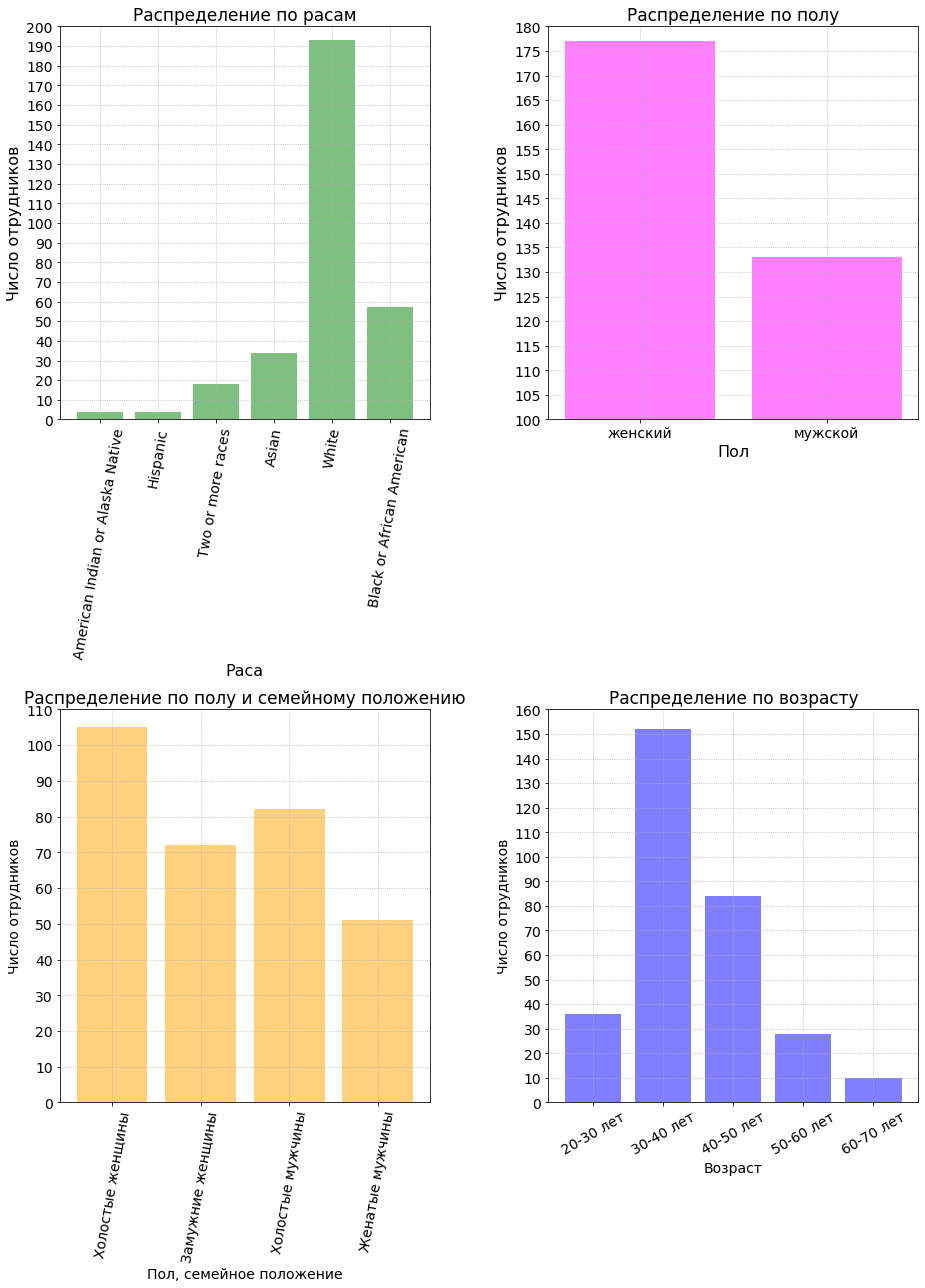

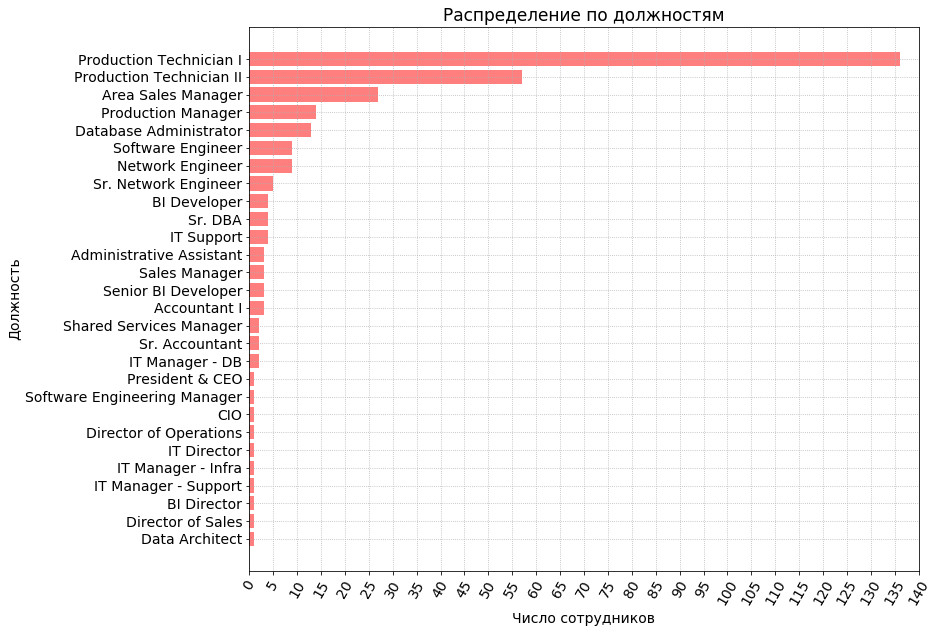

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize =(13, 18))

#Построение графика распределения по расам  
subplot = fig.add_subplot(2, 2, 1)
x_values = races.race.values
y_values = races.num_of_employees.values    
subplot.bar(x_values, y_values, color = 'green', alpha = 0.5)    
plt.xticks(x_values, rotation = 80, labels = x_values, FontSize=14)
y_ticks = np.arange(0, 210, 10)
plt.yticks(y_ticks, labels = y_ticks, FontSize=14)
subplot.set_ylabel('Число отрудников', FontSize = 16)
subplot.set_xlabel('Раса', FontSize = 16)
subplot.set_title('Распределение по расам', FontSize = 17)
subplot.set_ylim(bottom=0, top=200) 
plt.grid(linestyle = ':')


#Построение графика распределения по полу  
subplot = fig.add_subplot(2, 2, 2)
x_values = ('женский', 'мужской')
y_values = sex.num_of_employees.values    
subplot.bar(x_values, y_values, color = 'magenta', alpha = 0.5)    
plt.xticks(x_values, labels = x_values, FontSize=14)
y_ticks = np.arange(100, 190, 5)
plt.yticks(y_ticks, labels = y_ticks, FontSize=14)
subplot.set_ylabel('Число отрудников', FontSize = 16)
subplot.set_xlabel('Пол', FontSize = 16)
subplot.set_title('Распределение по полу', FontSize = 17)
subplot.set_ylim(bottom=100, top=180) 
plt.grid(linestyle = ':')

#Построение графика распределения по полу и семейному положению
married_status = ('Холостые женщины', 'Замужние женщины', 'Холостые мужчины', 'Женатые мужчины')
subplot = fig.add_subplot(2, 2, 3)
x_values = married_status
y_values = sex_married.num_of_employees.values    
subplot.bar(x_values, y_values, color = 'orange', alpha = 0.5)    
plt.xticks(x_values, rotation = 80, labels = x_values, FontSize=14)
y_ticks = np.arange(0, 120, 10)
plt.yticks(y_ticks, labels = y_ticks, FontSize=14)
subplot.set_ylabel('Число отрудников', FontSize = 14)
subplot.set_xlabel('Пол, семейное положение', FontSize = 14)
subplot.set_title('Распределение по полу и семейному положению', FontSize = 17)
subplot.set_ylim(bottom=0, top=110) 
plt.grid(linestyle = ':')

#Построение графика распределения по возрасту
ages_values = [str(int(i))+'-'+str(int(i)+10)+' лет' for i in age.decade_age.values]
subplot = fig.add_subplot(2, 2, 4)
x_values = ages_values
y_values = age.num_of_employees.values    
subplot.bar(x_values, y_values, color = 'blue', alpha = 0.5)    
plt.xticks(x_values, rotation = 30, labels = x_values, FontSize=14)
y_ticks = np.arange(0, 270, 10)
plt.yticks(y_ticks, labels = y_ticks, FontSize=14)
subplot.set_ylabel('Число отрудников', FontSize = 14)
subplot.set_xlabel('Возраст', FontSize = 14)
subplot.set_title('Распределение по возрасту', FontSize = 17)
subplot.set_ylim(bottom=0, top=160) 
plt.grid(linestyle = ':')


plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize =(12, 10))
plt.grid(linestyle = ':')
x_values = position.num_of_employees.values 
y_values = position.position.values
ax.barh(y_values, x_values, align = 'center', color = 'red', alpha = 0.5)
x_ticks = np.arange(0, 150, 5)
ax.set_ylabel('Должность', FontSize = 14)
ax.set_xlabel('Число сотрудников', FontSize = 14)
plt.xticks(x_ticks, rotation = 60, FontSize=14)
plt.yticks(y_values, FontSize=14)
ax.set_title('Распределение по должностям', FontSize = 17)
ax.set_xlim(left = 0, right = 140) 
plt.show()

**Выводы:** Типичный сотрудник компании - белый человек в возрасте от 30 до 40 лет. Поскольку подавляющее большинство сотрудников имеют гражданство США (поле citizendesc в таблице hr_dataset), можно сделать вывод, что компания расположена в США. Это страна, в которой представлено множество рас, однако, в рассматриваемой компании белых больше, чем представителей всех остальных рас вместе взятых. Это может говорить о том, что в компании существует определенная дискриминация по расовому признаку при приеме сотрудников на работу, руководству следует обратить на это внимание. Наибольшее число сотрудников представлено в отделе Production.

**1.5 Формирование и проверка гипотез**

***Гипотеза 1: Существует корреляция между полом сотрудника и уровнем занимаемой им должности.***<br><br>
Примем за высокооплачиваемые должности те позиции, у которых Salary Mid в таблице salary_grid > 75000, за низкооплачиваемые - те позиции, у которых Salary Mid < 50000. 

In [75]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT COUNT(*), "sex" FROM hr_dataset LEFT JOIN salary_grid ON
hr_dataset."position" = salary_grid."Position" WHERE "Salary Mid" <50000 GROUP BY "sex"; """
cursor.execute(sql_str)


print('Число мужчин и женщин, занимающих низкооплачиваемые должности в компании: \n')
[print(i) for i in cursor.fetchall()]
print('\n')

sql_str = """SELECT COUNT(*), "sex" FROM hr_dataset LEFT JOIN salary_grid ON
hr_dataset."position" = salary_grid."Position" WHERE "Salary Mid" > 75000 GROUP BY "sex"; """
cursor.execute(sql_str)

print('Число мужчин и женщин, занимающих высокооплачиваемые должности в компании: \n')
[print(i) for i in cursor.fetchall()]

cursor.close()
conn.close()

Число мужчин и женщин, занимающих низкооплачиваемые должности в компании: 

(123, 'Female')
(73, 'Male')


Число мужчин и женщин, занимающих высокооплачиваемые должности в компании: 

(6, 'Female')
(5, 'Male')


Мы видим, что, если среди людей на высокооплачиваемых должностях (руководящего состава компании) примерно поровну мужчин и женщин, то на <br>низкооплачиваемых должностях женщин значительно больше. Однако, в компании в целом женщин больше, поэтому более объективным будет <br> сравнение процентных значений (процента женщин от общего числа женщин и процента мужчин от общего числа мужчин).

In [76]:
conn = ps2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT COUNT(*)*100/(SELECT COUNT(*) FROM hr_dataset WHERE "sex"='Male') FROM hr_dataset 
LEFT JOIN salary_grid ON hr_dataset."position" = salary_grid."Position" WHERE "sex"='Male'AND "Salary Mid" < 50000; """
cursor.execute(sql_str)


print(f'Процент мужчин, занимающих низкооплачиваемые должности в компании, от общего числа мужчин: {cursor.fetchone()[0]}')

sql_str = """SELECT COUNT(*)*100/(SELECT COUNT(*) FROM hr_dataset WHERE "sex"='Female') FROM hr_dataset 
LEFT JOIN salary_grid ON hr_dataset."position" = salary_grid."Position" WHERE "sex"='Female'AND "Salary Mid" < 50000; """
cursor.execute(sql_str)

print(f'Процент женщин, занимающих низкооплачиваемые должности в компании, от общего числа женщин: {cursor.fetchone()[0]}')


sql_str = """SELECT COUNT(*)*100/(SELECT COUNT(*) FROM hr_dataset WHERE "sex"='Male') FROM hr_dataset 
LEFT JOIN salary_grid ON hr_dataset."position" = salary_grid."Position" WHERE "sex"='Male'AND "Salary Mid" > 75000; """
cursor.execute(sql_str)


print(f'Процент мужчин, занимающих высокооплачиваемые должности в компании, от общего числа мужчин: {cursor.fetchone()[0]}')

sql_str = """SELECT COUNT(*)*100/(SELECT COUNT(*) FROM hr_dataset WHERE "sex"='Female') FROM hr_dataset 
LEFT JOIN salary_grid ON hr_dataset."position" = salary_grid."Position" WHERE "sex"='Female'AND "Salary Mid" > 75000; """
cursor.execute(sql_str)

print(f'Процент женщин, занимающих высокооплачиваемые должности в компании, от общего числа женщин: {cursor.fetchone()[0]}')



cursor.close()
conn.close()

Процент мужчин, занимающих низкооплачиваемые должности в компании, от общего числа мужчин: 54
Процент женщин, занимающих низкооплачиваемые должности в компании, от общего числа женщин: 69
Процент мужчин, занимающих высокооплачиваемые должности в компании, от общего числа мужчин: 3
Процент женщин, занимающих высокооплачиваемые должности в компании, от общего числа женщин: 3


**Вывод**: среди женщин больший процент работников на низкооплачиваемых должностях, чем среди мужчин. На высокооплачиваемых должностях <br>
процент одинаков. Следовательно, в компании имеются затруднения при переходе женщин на должности среднего звена с низкооплачиваемых<br> должностей.

***Гипотеза 2: В отделе Production cуществует зависимость между показателем Daily Error Rate (ежедневный коэффициент ошибок) от того, под руководством какого менеджера работает сотрудник.***

In [77]:
conn = ps2.connect(**pg_connection)

sql_str = """SELECT AVG("Daily Error Rate") AS avg_err, COUNT(*) AS "num_of_employees", "Manager Name" FROM production_staff 
WHERE "Employee Name" IS NOT NULL GROUP BY "Manager Name" ORDER BY "avg_err"; """
df1 = pd.read_sql_query(sql_str, conn)

conn.close()

print("Статистика по усредненному показателю Daily Error Rate сотрудников, работающих под руководством каждого из менеджеров:")
df1

Статистика по усредненному показателю Daily Error Rate сотрудников, работающих под руководством каждого из менеджеров:


,avg_err,num_of_employees,Manager Name
0,0.000000,14,Elisa Bramante
1,0.681818,22,Kelley Spirea
2,0.761905,21,Brannon Miller
3,0.904762,22,Kissy Sullivan
4,0.913043,23,Michael Albert
5,0.952381,21,Amy Dunn
6,0.952381,21,Ketsia Liebig
7,1.142857,21,Webster Butler
8,1.190476,21,David Stanley
9,1.217391,23,Elijiah Gray


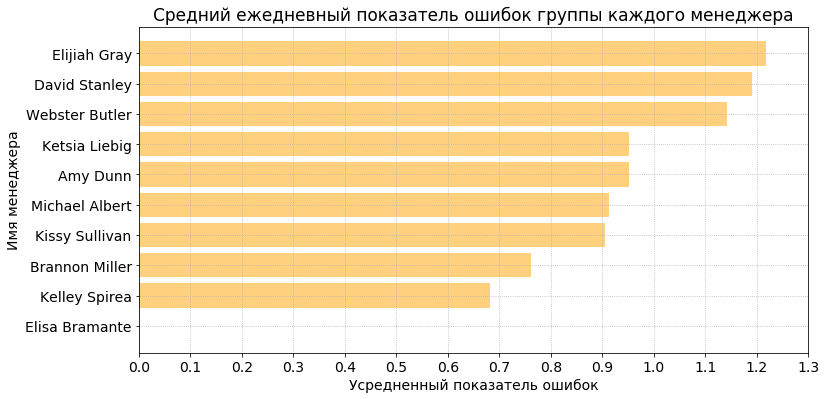

In [78]:
fig, ax = plt.subplots(figsize =(12, 6))
plt.grid(linestyle = ':')
x_values = df1['avg_err'].values
y_values = df1['Manager Name'].values 
ax.barh(y_values, x_values, align = 'center', color = 'orange', alpha = 0.5)
x_ticks = np.arange(0, 140, 10)*0.01
ax.set_ylabel('Имя менеджера', FontSize = 14)
ax.set_xlabel('Усредненный показатель ошибок', FontSize = 14)
plt.xticks(x_ticks, FontSize=14)
plt.yticks(y_values, FontSize=14)
ax.set_title('Средний ежедневный показатель ошибок группы каждого менеджера', FontSize = 17)
ax.set_xlim(left = 0, right = 1.3) 
plt.show()

**Вывод:** усредненной показатель Daily Error Rate в отделе Production зависит от того, под руководством какого из менеджеров работают сотрудники. Наиболее успешные с этой точки зрения менеджеры Elisa Bramante, Kelley Spirea, Brannon Miller, наименее успешные - Webster Butler, David Stanley, Elijiah Gray. Однако, стоит также учитывать, что у наиболее успешного менеджера Elisa Bramante находится в подчинении 14 сотрудников, что заметно меньше, чем у остальных менеджеров, соответственно, эффективное руководство для нее организовать проще, чем для остальных менеджеров.

***Гипотеза 3: Существуют более эффективные и менее эффективные информационные источники привлечения новых сотрудников.***<br>
В качестве показателя эффективности примем денежные затраты на привлечение сотрудника с помощью данного информационного источника: чем они выше, тем эффективность ниже.

In [79]:
conn = ps2.connect(**pg_connection)

#Затраты на одного сотрудника (cost_per_employee) вычисляются как отношение значения 'Total' из таблицы recruiting_costs для
#соответствующего информационного источника к числу сотрудников, привлеченных благодаря этому источнику. После группировки 
#GROUP BY нужное значение 'Total' можно получить из AVG('Total')
sql_str = """SELECT ROUND(AVG("Total")/COUNT(*), 2) AS cost_per_employee, COUNT(*) AS "num_of_employees", "Employee Source"  
FROM hr_dataset LEFT JOIN recruiting_costs ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
GROUP BY "Employee Source" ORDER BY "Employee Source"; """
df2 = pd.read_sql_query(sql_str, conn)

conn.close()

print("Эффективность привлечения сотрудников из разных информационных источников:")
df2

Эффективность привлечения сотрудников из разных информационных источников:


,cost_per_employee,num_of_employees,Employee Source
0,387.00,16,Billboard
1,7790.00,1,Careerbuilder
2,0.00,1,Company Intranet - Partner
3,345.55,29,Diversity Job Fair
4,0.00,31,Employee Referral
5,0.00,14,Glassdoor
6,NaN,8,Indeed
7,0.00,4,Information Session
8,0.00,6,Internet Search
9,645.88,17,MBTA ads


Видно, что есть очень затратные источники Careerbuilder и Pay Per Click, однако, с помощью них привлечено всего по одному
сотруднику. Если привлекаются высококвалифицированные сотрудники: топ-менеджеры, ведущие специалисты и т.д., то такие затраты
обоснованы. Чтобы исключить их влияние на общую статистику и сделать ее более объективной, будем рассматривать только те источники, 
с помощью которых привлечено более 10 сотрудников.

In [80]:
conn = ps2.connect(**pg_connection)

#Чтобы выполнить вышеприведенное условие, добавляем к предыдущему запросу конструкцию HAVING COUNT(*) > 10
sql_str = """SELECT ROUND(AVG("Total")/COUNT(*), 2) AS cost_per_employee, COUNT(*) AS "num_of_employees", "Employee Source"  
FROM hr_dataset LEFT JOIN recruiting_costs ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
GROUP BY "Employee Source" HAVING COUNT(*) > 10 ORDER BY "Employee Source"; """
df3 = pd.read_sql_query(sql_str, conn)

conn.close()

print("Эффективность привлечения сотрудников из разных информационных источников:")
df3

Эффективность привлечения сотрудников из разных информационных источников:


,cost_per_employee,num_of_employees,Employee Source
0,387.00,16,Billboard
1,345.55,29,Diversity Job Fair
2,0.00,31,Employee Referral
3,0.00,14,Glassdoor
4,645.88,17,MBTA ads
5,240.00,24,Monster.com
6,460.61,18,Newspager/Magazine
7,625.00,12,On-campus Recruiting
8,167.10,21,Pay Per Click - Google
9,60.00,20,Professional Society


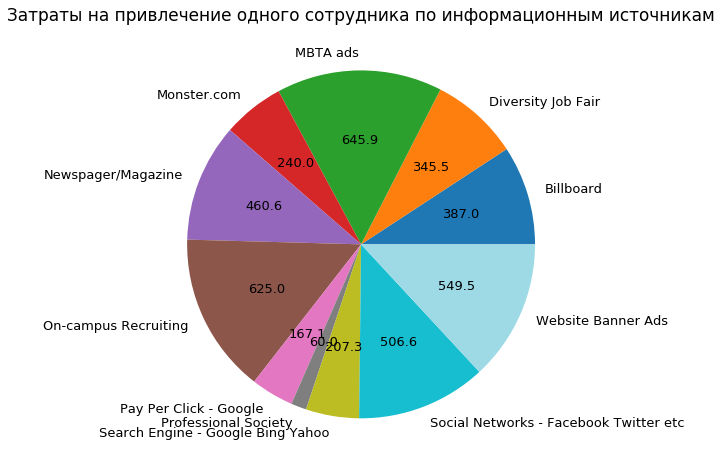

In [81]:
from matplotlib import cm #Импортируем библиотеку для работы с colormap
colors = cm.get_cmap('tab20', 11).colors #Создаем массив с 11-ю различными цветами, используя colormap 'tab20'
fig, ax = plt.subplots(figsize =(8, 8))
df4 = df3[df3['cost_per_employee']!=0] #Убираем из круговой диаграммы источники с нулевыми cost_per_employee. Отображаться они 
#не будут все равно, а вот их названия могут "налезть" на другие надписи на диаграмме
x_values = df4['Employee Source'].values
y_values = df4['cost_per_employee'].values 
func = lambda x: str(round(x*df4['cost_per_employee'].agg(sum)/100, 1)) #Перевод из процентного представления, которое 
#используется в pie-диаграммах, в обычное числовое
ax.pie(y_values, labels = x_values, colors = colors, autopct=func, textprops = {'fontsize': 13})
ax.set_title('Затраты на привлечение одного сотрудника по информационным источникам', FontSize = 17)
plt.show()

**Вывод**: Расходы на привлечение одного сотрудника разные для разных информационных источников. Есть источники, на продвижение в которых компания вообще не вкладывает средств, но новые сотрудники оттуда поступают: Company Intranet - Partner, Employee Referral, Glassdoor, Information Session, Internet Search, On-line Web application, Vendor Referral, Word of Mouth. Из источников,в которые компания вкладывает средства на рекламу, наиболее эффективными оказались Professional Society и Pay Per Click - Google, наименее эффективными - On-campus Recruiting и MBTA ads.

***Гипотеза 4: Есть зависимость между продолжительностью работы в компании и расой сотрудника.***

In [82]:
conn = ps2.connect(**pg_connection)

sql_str = """SELECT ROUND(AVG("Days Employed"), 1) AS "duration_of_work, days", "racedesc" AS "race" 
              FROM hr_dataset GROUP BY "race";"""
df5 = pd.read_sql_query(sql_str, conn)

conn.close()

print("Зависимость продолжительности работы в компании от расы сотрудника:")
df5

Зависимость продолжительности работы в компании от расы сотрудника:


,"duration_of_work, days",race
0,1845.0,American Indian or Alaska Native
1,1547.3,Hispanic
2,1628.3,Two or more races
3,1164.2,Asian
4,1230.4,White
5,1436.0,Black or African American


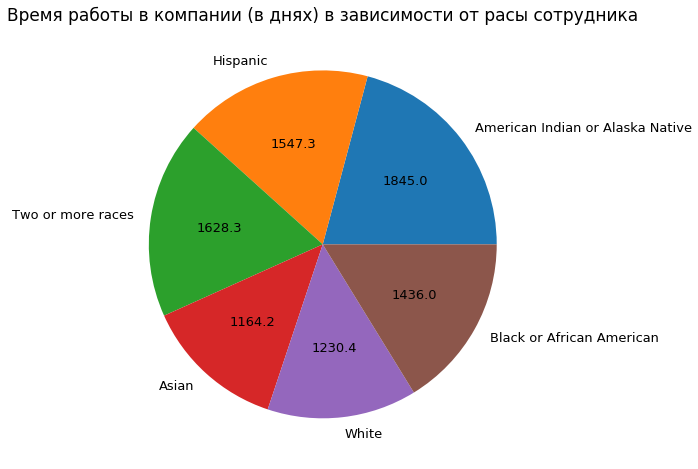

In [83]:
fig, ax = plt.subplots(figsize =(8, 8))
x_values = df5.race.values
y_values = df5["duration_of_work, days"].values 
func2 = lambda x: str(round(x*df5["duration_of_work, days"].agg(sum)/100, 1)) #Перевод из процентного представления, которое 
#используется в pie-диаграммах, в обычное числовое
ax.pie(y_values, labels = x_values, colors = colors, autopct=func2, textprops = {'fontsize': 13})
ax.set_title('Время работы в компании (в днях) в зависимости от расы сотрудника', FontSize = 17)
plt.show()

**Вывод**: Компании следует привлекать больше сотрудников разных рас не только из соображений имиджа и репутации, но и исходя из стратегических целей. Несмотря на то, что подавляющее большинство сотрудников компании составляют белые, их продолжительность работы в компании невысока (меньше только у азиатов). Для компании невыгодна "текучка" кадров. Сотрудники, имеющие расы American Indian or Alaska Native, Two or more races, Hispanic имеют тенденцию к более продолжительной работе в компании, стоит это учесть при приеме новых кандидатов на работу.

***Гипотеза 5: Есть зависимость между средней почасовой оплатой и возрастом сотрудника в отделе Production.***

In [84]:
conn = ps2.connect(**pg_connection)

sql_str = """SELECT ROUND(AVG(CAST("Pay" AS Numeric)), 2) AS "avg_hourly_rate", FLOOR("age"/10)*10 AS "decade_age"
             FROM production_staff JOIN hr_dataset ON production_staff."Employee Name" = hr_dataset."Employee Name" 
             GROUP BY "decade_age" ORDER BY "decade_age"; """

df6 = pd.read_sql_query(sql_str, conn)

conn.close()

print("Зависимость средней почасовой оплаты от возраста сотрудника в отделе Production:")
df6

Зависимость средней почасовой оплаты от возраста сотрудника в отделе Production:


,avg_hourly_rate,decade_age
0,20.94,20.0
1,22.41,30.0
2,24.37,40.0
3,21.76,50.0
4,24.38,60.0


Здесь используются те же обозначения, что и ранее: 20.0 - сотрудники возраста 20-30 лет, 30.0 - 30-40 лет и т.д. 

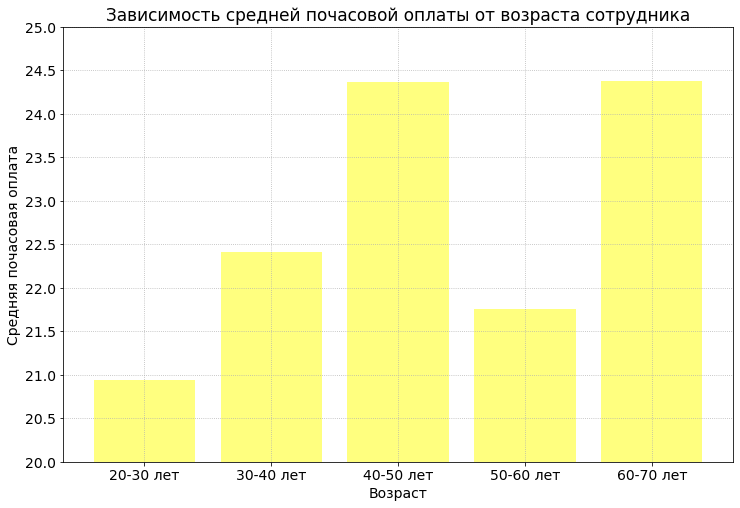

In [85]:
fig, ax = plt.subplots(figsize =(12, 8))


ages_values = [str(int(i))+'-'+str(int(i)+10)+' лет' for i in df6.decade_age.values]

x_values = ages_values
y_values = df6.avg_hourly_rate.values    
ax.bar(x_values, y_values, color = 'yellow', alpha = 0.5)    
plt.xticks(x_values, labels = x_values, FontSize=14)
y_ticks = np.arange(20, 26, 0.5)
plt.yticks(y_ticks, labels = y_ticks, FontSize=14)
ax.set_ylabel('Средняя почасовая оплата', FontSize = 14)
ax.set_xlabel('Возраст', FontSize = 14)
ax.set_title('Зависимость средней почасовой оплаты от возраста сотрудника', FontSize = 17)
ax.set_ylim(bottom=20, top=25) 
plt.grid(linestyle = ':')

**Вывод**: Средняя почасовая оплата имеет тенденцию к росту с увеличением возраста сотрудника (растет профессионализм, прибавляется опыт). Однако, уровень оплаты падает у возрастной категории 50-60 лет. HR-отдел должен обратить внимание на сотрудников этой возрастной категории и выяснить, с чем связан данный факт.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

**2.1 Сбор данных из паблика ВК**

In [86]:
import requests
from datetime import datetime, timedelta
import re

def getjson(url): #Функция, преобразующая результат запроса GET к словарю json
    response = requests.get(url)
    response = response.json()
    return response

def to_date(date): #Функция приводит дату к привычному виду
    return (datetime.fromtimestamp(date) - timedelta(hours=0))

In [87]:
#Получаем последнюю запись из паблика Skillbox Вконтакте в виде словаря json и исследуем, как "устроен" типичный пост в ВК
vk_token = '...'
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=1&v=5.92'
response = getjson(url)
response

{'response': {'count': 7741,
  'items': [{'id': 74523,
    'from_id': -66669811,
    'owner_id': -66669811,
    'date': 1592493710,
    'marked_as_ads': 0,
    'post_type': 'post',
    'text': 'Влад работал стилистом и хотел открыть свой салон красоты. Но теперь он программист, пилит площадку для владельцев клубов и собирается изучать бекэнд. Ничего себе поворот, да?\nПочитайте, это интересная история.\n\n#Статья_Skillbox',
    'attachments': [{'type': 'link',
      'link': {'url': 'https://m.vk.com/@skillbox_education-mne-kazalos-chto-programmirovanie-eto-tainoe-znanie-dlya-izb',
       'title': '«Мне казалось, что программирование — это тайное знание для избранных»',
       'caption': 'm.vk.com',
       'description': 'Статья',
       'photo': {'album_id': -66,
        'date': 1592492044,
        'id': 457501230,
        'owner_id': -66669811,
        'has_tags': False,
        'sizes': [{'height': 58,
          'url': 'https://sun1-23.userapi.com/c857124/v857124398/1a5c84/NyOYdQ84BK

Будем исследовать посты в паблике за последний год (с июля 2019 по июнь 2020), поскольку это наиболее свежие и актуальные данные для построения статистики. Для удобства, поскольку единовременная максимальная выдача постов в ВК составляет 100 штук, будем рассматривать последние 700 постов (это число как раз приблизительно соответствует полному году). Т.е. максимальное значение параметра offset у нас будет равно 600.

In [88]:
my_dat = pd.DataFrame() #Заготовка будущего датафрейма
offset = 0 #Начинаем c offset=0, ему будут соответствовать последние 100 постов
while offset <=600:
    url = 'https://api.vk.com/method/wall.get?access_token=' + (str(vk_token) + 
    '&owner_id=-66669811&offset='+ str(offset) + '&count=100&v=5.92')
    response = getjson(url)
    post_id = list() #Заготовки столбцов датафрейма
    date = list()
    text = list()
    views = list()
    likes = list()
    reposts = list()
    comments = list()
    for i in range(len(response['response']['items'])): #Заполняем соответствующие списки
        post_id.append(response['response']['items'][i]['id'])
        date.append(response['response']['items'][i]['date'])
        text.append(response['response']['items'][i]['text'])
        views.append(response['response']['items'][i]['views']['count'])
        likes.append(response['response']['items'][i]['likes']['count'])
        reposts.append(response['response']['items'][i]['reposts']['count'])
        comments.append(response['response']['items'][i]['comments']['count'])
    #Создаем словарь, соответствующий просматриваемым в данный момент 100 постам,  а из него - датафрейм
    temp_dict = {'post_id':post_id, 'date':date, 'text':text, 
                 'views':views, 'likes':likes, 'reposts':reposts, 'comments': comments}
    temp_dat = pd.DataFrame(temp_dict)
    #Присоединяем датафрейм, соответствующий текущим 100 постам, к основному датафрейму my_dat
    my_dat = pd.concat([my_dat, temp_dat], ignore_index = True)
    offset += 100 
    
    
    
my_dat['date'] = my_dat['date'].apply(to_date) #Преобразуем дату к привычному формату с помощью нашей функции to_date
my_dat['hour']=my_dat['date'].apply(lambda x: x.hour) #Добавляем к датафрейму еще один столбец, соответствующий часу, в котором 
#опубликован пост
my_dat       

,post_id,date,text,views,likes,reposts,comments,hour
0,74523,2020-06-18 18:21:50,Влад работал стилистом и хотел открыть свой са...,5912,24,0,0,18
1,74521,2020-06-18 15:36:50,Поиграть или поискать работу?\n\nНе выбирайте ...,6436,27,4,0,15
2,74276,2020-06-18 11:26:03,"Как подчеркнуть в тексте нужную эмоцию, если в...",10995,94,10,8,11
3,73971,2020-06-17 19:37:01,"Как понять, зайдёт идея или не зайдёт? Хороший...",11160,24,4,12,19
4,73873,2020-06-17 14:00:20,Как вывести салоны красоты из карантина и верн...,12552,18,1,0,14
...,...,...,...,...,...,...,...,...
695,34749,2019-06-26 15:30:01,"Каждый день нас окружает информация: курсы, ле...",8039,39,1,0,15
696,34738,2019-06-26 09:42:14,Если вы тоже любите звуки и хотите попробовать...,7934,18,0,5,9
697,34700,2019-06-25 19:24:11,Далеко не каждый откажется от хорошей зарплаты...,9104,30,2,15,19
698,34667,2019-06-25 12:30:00,🥊 Битва за дизайн. Какой браузер удобнее?\n\nН...,7904,14,1,50,12


**2.2 Анализ влияния времени публикации поста на вовлеченность пользователей**

In [89]:
#Выводим число опубликованных за исследуемый промежуток времени (приблизительно год) постов в зависимости от часа публикации
#поста
time_count = my_dat.groupby('hour')['post_id'].agg('count')
time_count

hour
8       1
9       3
10     19
11     79
12    128
13     55
14     49
15     54
16     47
17     47
18     88
19     88
20     36
21      4
22      2
Name: post_id, dtype: int64

In [90]:
#Формируем датафрейм со средними и медианными показателями 'views', 'likes', 'reposts', 'comments' в зависимости от часа
#публикации поста
time_analysis = pd.pivot_table(my_dat, values = ['views', 'likes', 'reposts', 'comments'], 
                               index = ['hour'], aggfunc = [np.median, np.mean])
time_analysis

median                              mean                         \
     comments likes reposts    views   comments       likes    reposts   
hour                                                                     
8         5.0  73.0    11.0  18009.0   5.000000   73.000000  11.000000   
9         5.0  28.0     0.0   7934.0   5.666667   40.666667   3.666667   
10        6.0  40.0     3.0  11999.0  15.000000   66.473684   7.052632   
11        9.0  53.0     5.0  17468.0  20.759494   91.493671  10.658228   
12        7.5  64.5     5.0  15167.0  14.289062  108.210938  13.554688   
13        7.0  62.0     5.0  12276.0  11.963636   79.890909   8.218182   
14        5.0  41.0     3.0  13035.0  12.653061   58.673469   5.163265   
15        3.0  45.5     3.5  12868.0   7.203704   69.037037   7.944444   
16        4.0  52.0     4.0  13217.0  31.212766   88.297872  12.021277   
17        2.0  47.0     4.0  13339.0   5.425532   66.361702   8.893617   
18        2.0  42.0     4.0  12007.5   5.068182   58.636364   8.068182   
19        0.5  53.5     7.0  11999.0   4.681818   67.034091   9.602273   
20        3.0  50.0     6.0  11444.5   7.694444   70.444444   9.583333   
21        3.0  41.0     5.0   8697.0   3.750000   36.250000   4.500000   
22        1.0  29.5     1.5   7763.0   1.000000   29.500000   1.500000   

                    
             views  
hour                
8     18009.000000  
9     11068.333333  
10    15361.789474  
11    20505.443038  
12    20285.523438  
13    16746.654545  
14    14611.857143  
15    14929.148148  
16    16677.510638  
17    15839.000000  
18    14279.306818  
19    13598.625000  
20    14173.416667  
21     8558.750000  
22     7763.000000

In [91]:
list_of_categories = ('views', 'likes', 'reposts', 'comments') #Этот список будет нужен в дальнейшем для построения графиков

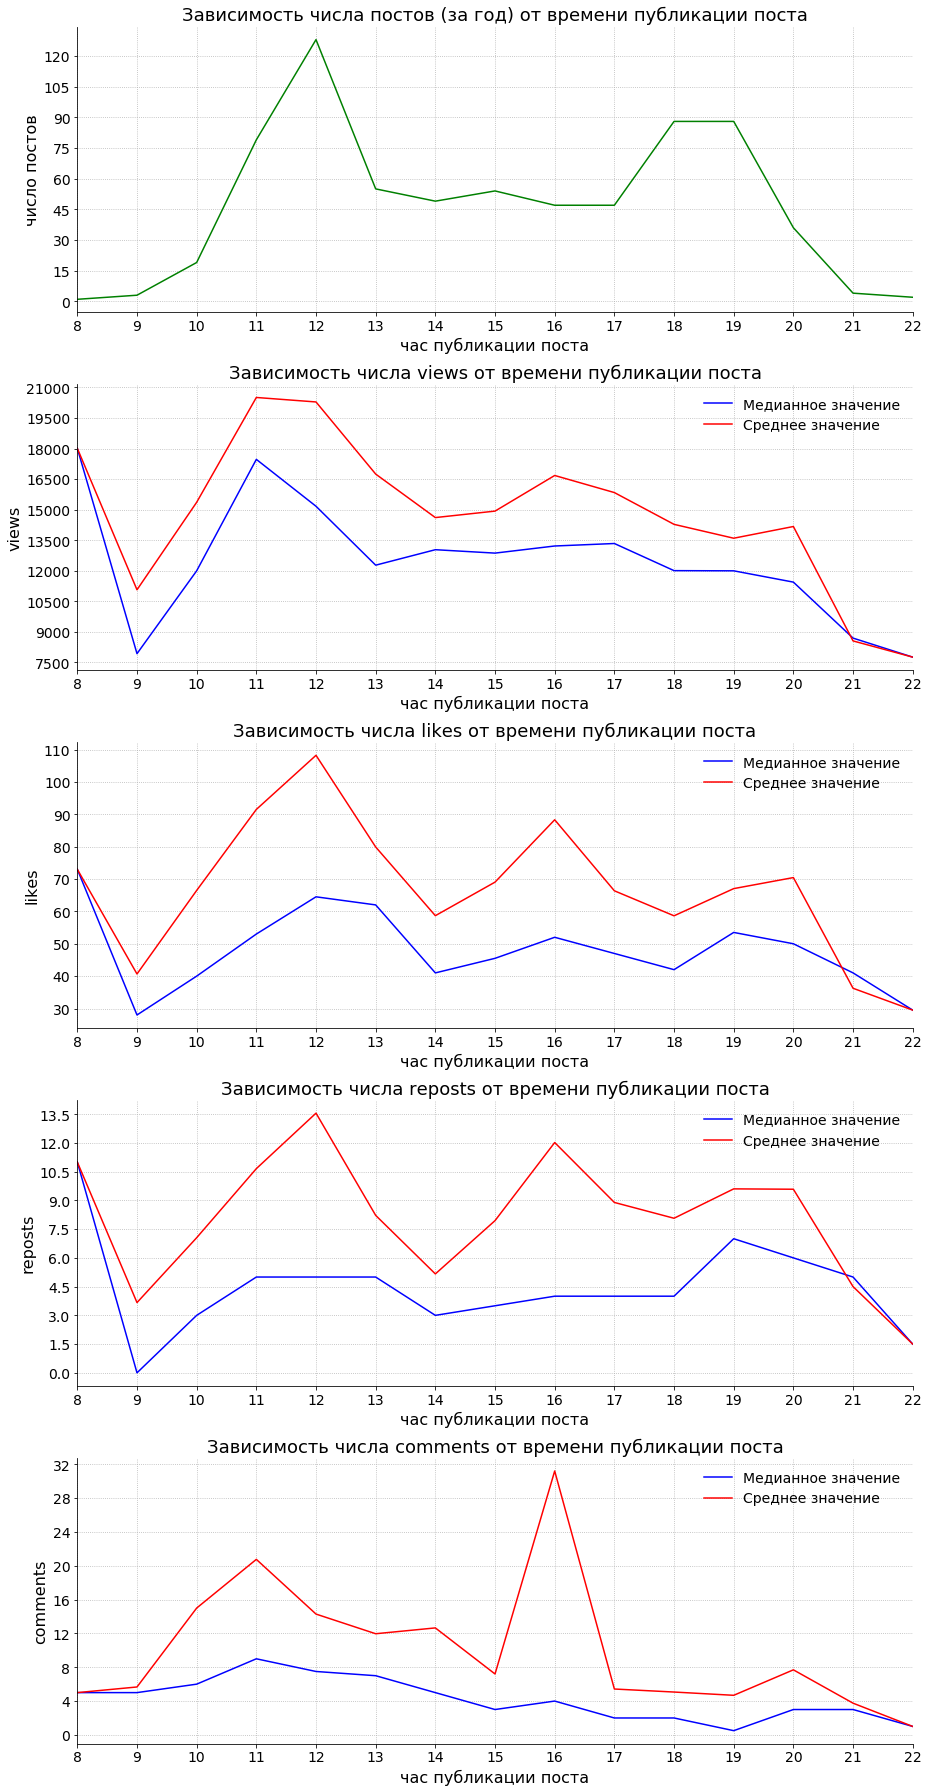

In [92]:
#Строим графики со сводными статистическими показателями в зависимости от часа публикации поста
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize =(13, 25))
x_values = time_analysis.index.values
y_values = time_count.values
subplot = fig.add_subplot(5, 1, 1)
subplot.plot(x_values, y_values, color = 'green')
plt.xticks(x_values, labels = x_values, FontSize=14)
plt.yticks(FontSize=14)
subplot.set_xlim(left = np.min(x_values), right = np.max(x_values))
subplot.spines['right'].set_visible(False) #Убираем рамки с графика
subplot.spines['top'].set_visible(False)
subplot.yaxis.set_major_locator(plt.MaxNLocator(10))
subplot.set_title(f'Зависимость числа постов (за год) от времени публикации поста', FontSize = 18)
subplot.set_xlabel('час публикации поста', FontSize = 16)
subplot.set_ylabel('число постов', FontSize = 16)
plt.grid(linestyle = ':')


for j in range(4):
    
    
    subplot = fig.add_subplot(5, 1, j+2)
    
    y_values = time_analysis[('median', list_of_categories[j])]
    subplot.plot(x_values, y_values, color = 'blue' ,label = 'Медианное значение')
    
    
    y_values = time_analysis[('mean', list_of_categories[j])]
    subplot.plot(x_values, y_values, color = 'red' ,label = 'Среднее значение')

    
    plt.xticks(x_values, labels = x_values, FontSize=14)
    plt.yticks(FontSize=14)
    subplot.set_xlim(left = np.min(x_values), right = np.max(x_values))
    subplot.legend(fontsize =14, loc = 'upper right', frameon = False) #Легенда
    subplot.spines['right'].set_visible(False)
    subplot.spines['top'].set_visible(False)
    subplot.yaxis.set_major_locator(plt.MaxNLocator(10))
    subplot.set_title(f'Зависимость числа {list_of_categories[j]} от времени публикации поста', FontSize = 18)
    subplot.set_xlabel('час публикации поста', FontSize = 16)
    subplot.set_ylabel(list_of_categories[j], FontSize = 16)
    plt.grid(linestyle = ':')
    
    
plt.tight_layout() 
plt.show()


**Вывод:** Наибольшая вовлеченность пользователей достигается при публикации поста во временных промежутках 11-12 часов, 12-13 часов. Как видно из первого графика, как раз во время от 12 до 13 часов и опубликовано наибольшее число постов, что является правильной стратегией. Можно увеличить число публикуемых постов во временном промежутке с 11 до 12 часов. Мы видим на первом графике локальные максимумы числа постов во временных промежутках с 18 до 19 и с 19 до 20 часов, однако вовлеченность пользователей относительно постов, опубликованных в это время, невелика. Более предпочтительным является временной промежуток с 16 до 17 часов, в который наблюдаются локальные пики вовлеченности. Поэтому стоит публиковать больше постов с 16 до 17 часов и меньше в промежутки 18-19, 19-20 часов.

**2.3 Анализ влияния рубрики поста на вовлеченность пользователей**

In [93]:
import re
reg_expr = r'#\w+' #Задаем соответствующее регулярное выражение для поиска тегов и компилируем его
reg_expr_compiled = re.compile(reg_expr)

find_tags = lambda x: reg_expr_compiled.findall(x) #Эта функция находит все теги в тексте поста
lowercase = lambda x: [i.lower() for i in x] #Эта функция делает все буквы в тегах маленькими. Это необходимо, потому что 
#в разных постах одни и те же теги написаны кое-где с большой буквы, а кое-где - с маленькой

In [94]:
my_dat['tags'] = my_dat['text'].apply(find_tags) #Формируем столбец с тегами и делаем все буквы в тегах 
my_dat['tags'] = my_dat['tags'].apply(lowercase) #маленькими
my_dat

,post_id,date,text,views,likes,reposts,comments,hour,tags
0,74523,2020-06-18 18:21:50,Влад работал стилистом и хотел открыть свой са...,5912,24,0,0,18,[#статья_skillbox]
1,74521,2020-06-18 15:36:50,Поиграть или поискать работу?\n\nНе выбирайте ...,6436,27,4,0,15,"[#анонс_skillbox, #game_of_jobs, #будувskillbox]"
2,74276,2020-06-18 11:26:03,"Как подчеркнуть в тексте нужную эмоцию, если в...",10995,94,10,8,11,"[#в_закладки_skillbox, #skillbox_дизайн]"
3,73971,2020-06-17 19:37:01,"Как понять, зайдёт идея или не зайдёт? Хороший...",11160,24,4,12,19,[#статья_skillbox]
4,73873,2020-06-17 14:00:20,Как вывести салоны красоты из карантина и верн...,12552,18,1,0,14,"[#анонс_skillbox, #skillbox_управление]"
...,...,...,...,...,...,...,...,...,...
695,34749,2019-06-26 15:30:01,"Каждый день нас окружает информация: курсы, ле...",8039,39,1,0,15,"[#анонс_skillbox, #skillbox_sceinceme]"
696,34738,2019-06-26 09:42:14,Если вы тоже любите звуки и хотите попробовать...,7934,18,0,5,9,"[#курс_skillbox, #skillbox_дизайн]"
697,34700,2019-06-25 19:24:11,Далеко не каждый откажется от хорошей зарплаты...,9104,30,2,15,19,"[#статья_skillbox, #skillbox_дизайн]"
698,34667,2019-06-25 12:30:00,🥊 Битва за дизайн. Какой браузер удобнее?\n\nН...,7904,14,1,50,12,[]


In [95]:
#Формируем список выбранных для анализа тегов (рубрик)
list_of_tags = ('#в_закладки_skillbox', '#статья_skillbox', '#skillbox_вдохновляет', '#расписание_skillbox', 
                '#лекторий_skillbox', '#конкурс_skillbox', '#вам_слово_skillbox')
#Формируем столбцы с названиями тегов. В этих столбцах True, если этот тег присутствует в соответствующем тексте, иначе False
for i in list_of_tags:
    my_dat[i] = my_dat['tags'].apply(lambda x: i in x)

my_dat.head(10)

,post_id,date,text,views,likes,reposts,comments,hour,tags,#в_закладки_skillbox,#статья_skillbox,#skillbox_вдохновляет,#расписание_skillbox,#лекторий_skillbox,#конкурс_skillbox,#вам_слово_skillbox
0,74523,2020-06-18 18:21:50,Влад работал стилистом и хотел открыть свой са...,5912,24,0,0,18,[#статья_skillbox],False,True,False,False,False,False,False
1,74521,2020-06-18 15:36:50,Поиграть или поискать работу?\n\nНе выбирайте ...,6436,27,4,0,15,"[#анонс_skillbox, #game_of_jobs, #будувskillbox]",False,False,False,False,False,False,False
2,74276,2020-06-18 11:26:03,"Как подчеркнуть в тексте нужную эмоцию, если в...",10995,94,10,8,11,"[#в_закладки_skillbox, #skillbox_дизайн]",True,False,False,False,False,False,False
3,73971,2020-06-17 19:37:01,"Как понять, зайдёт идея или не зайдёт? Хороший...",11160,24,4,12,19,[#статья_skillbox],False,True,False,False,False,False,False
4,73873,2020-06-17 14:00:20,Как вывести салоны красоты из карантина и верн...,12552,18,1,0,14,"[#анонс_skillbox, #skillbox_управление]",False,False,False,False,False,False,False
5,73648,2020-06-16 19:11:28,"Июнь в самом разгаре, а учеба в Skillbox — тем...",14685,24,2,3,19,[#лекторий_skillbox],False,False,False,False,True,False,False
6,73415,2020-06-15 19:45:50,Хотите поиграться со шрифтами? У нас вышел гай...,18364,98,18,17,19,"[#статья_skillbox, #skillbox_дизайн]",False,True,False,False,False,False,False
7,73396,2020-06-15 18:09:03,Продолжаем радовать вас новыми крутыми вебинар...,16603,31,1,0,18,[#расписание_skillbox],False,False,False,True,False,False,False
8,73232,2020-06-15 15:38:32,Любите устраивать перестановки в комнате? Похо...,31133,282,23,19,15,"[#skillbox_дизайн, #в_закладки_skillbox]",True,False,False,False,False,False,False
9,72944,2020-06-14 13:25:56,Хотите освоить язык программирования? Let’s Go...,20299,56,0,19,13,"[#анонс_курса, #skillbox_программирование]",False,False,False,False,False,False,False


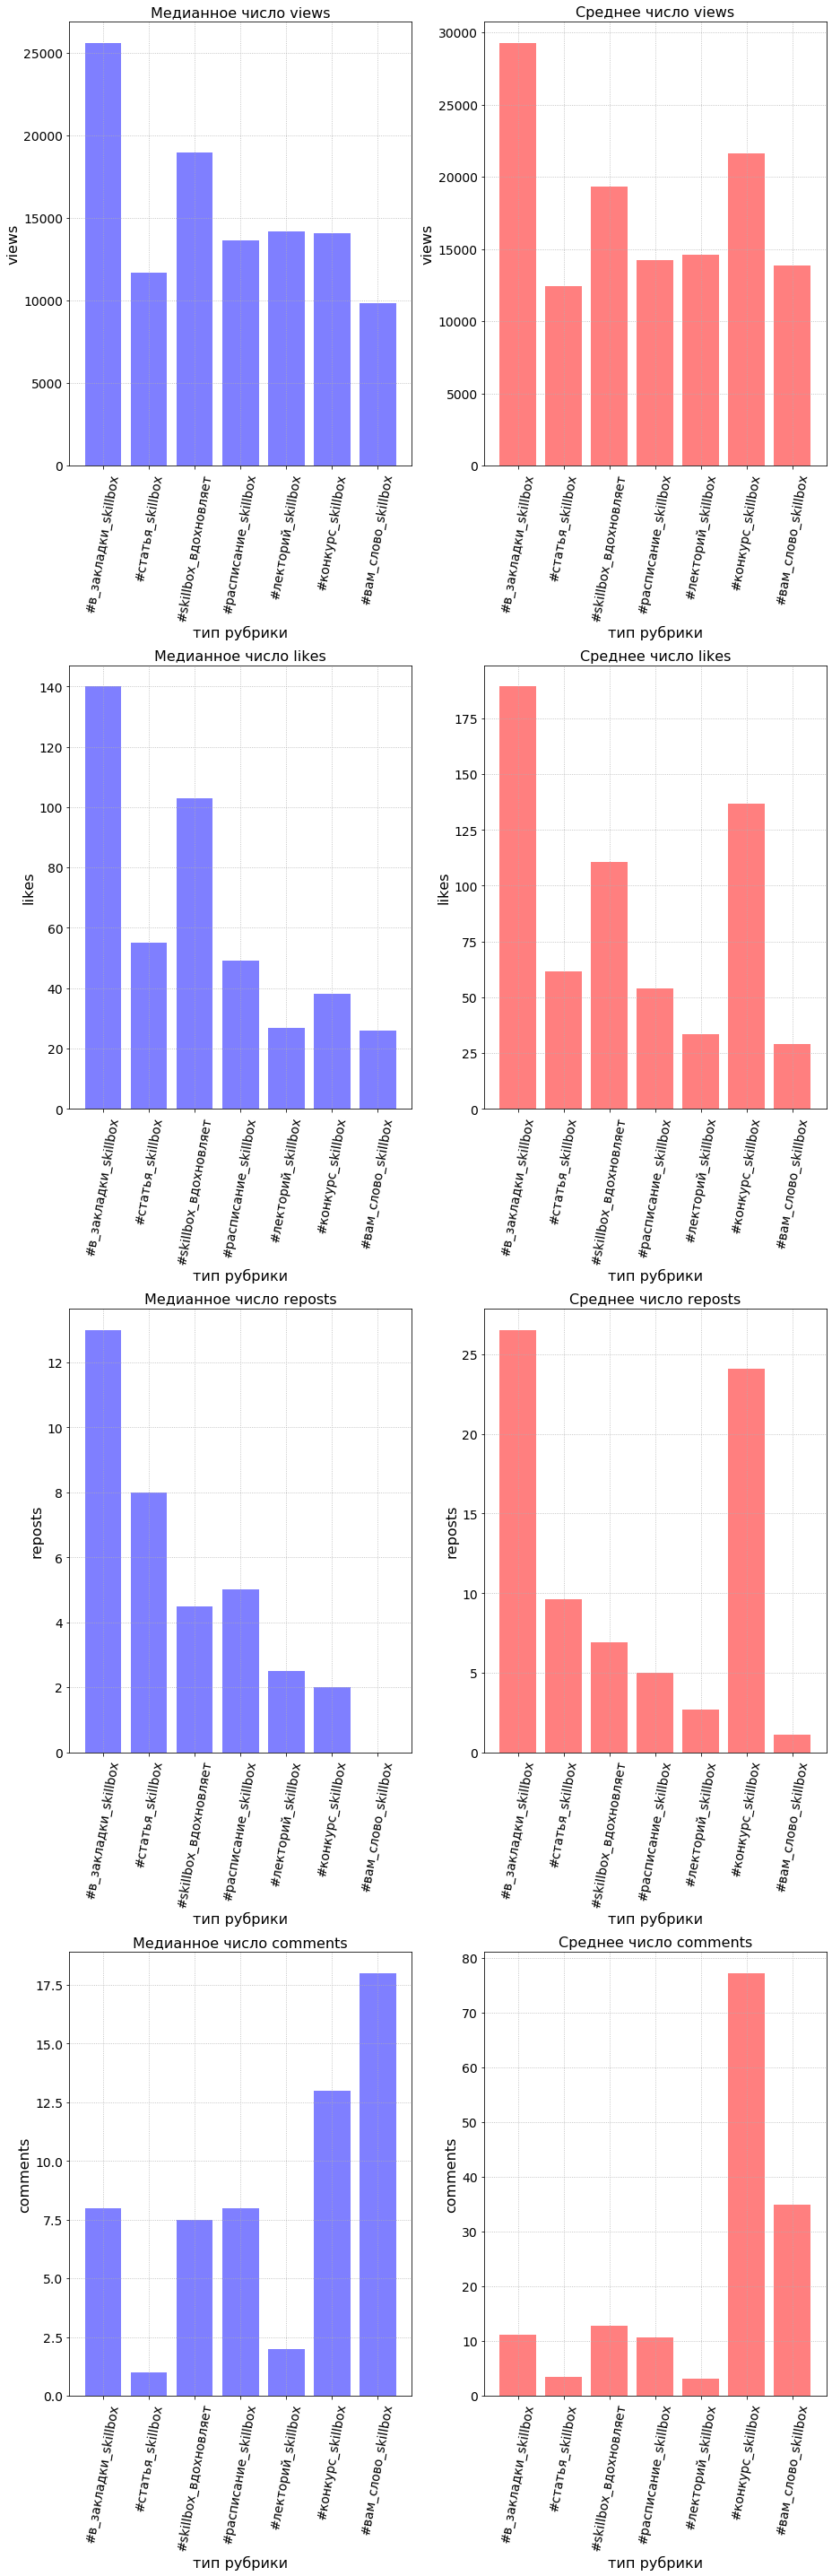

In [96]:
#Построение столбчатых диаграмм, отражающих показатели вовлеченности пользователей в зависимости от рубрики поста
%matplotlib inline

fig = plt.figure(figsize =(13, 40))

for j in [1, 3, 5, 7]:
    subplot = fig.add_subplot(4, 2, j)
    x_values = list_of_tags #По оси х - названия рубрик на всех графиках
    y_values =[]
    for k in list_of_tags:
        #Формируем значения медианы по рубрикамм для соответствующей категории вовлеченности (просмотры, лайки и т.д.)
        y_values.append(my_dat[my_dat[k]==True][list_of_categories[j//2]].agg(np.median)) 
    subplot.bar(x_values, y_values, color = 'blue', alpha = 0.5)    
    plt.xticks(rotation = 80, FontSize=14)
    plt.yticks(FontSize=14)
    subplot.set_ylabel(list_of_categories[j//2], FontSize = 16)
    subplot.set_xlabel('тип рубрики', FontSize = 16)
    subplot.set_title(f'Медианное число {list_of_categories[j//2]}', FontSize = 16)
    plt.grid(linestyle = ':')
    
    subplot = fig.add_subplot(4, 2, j+1)
    x_values = list_of_tags
    y_values =[]
    for k in list_of_tags:
        #Формируем средние значения по рубрикамм для соответствующей категории вовлеченности (просмотры, лайки и т.д.)
        y_values.append(my_dat[my_dat[k]==True][list_of_categories[j//2]].agg(np.mean)) 
    subplot.bar(x_values, y_values, color = 'red', alpha = 0.5)    
    plt.xticks(rotation = 80, FontSize=14)
    plt.yticks(FontSize=14)
    subplot.set_ylabel(list_of_categories[j//2], FontSize = 16)
    subplot.set_xlabel('тип рубрики', FontSize = 16)
    subplot.set_title(f'Среднее число {list_of_categories[j//2]}', FontSize = 16)
    plt.grid(linestyle = ':')
   
    
plt.tight_layout()    
plt.show()

Для более релевантной статистики посчитаем также число постов по рубрикам за год:

In [97]:
for i in list_of_tags:
    print(f'Число постов в рубрике {i}: {my_dat[i].agg(sum)}')

Число постов в рубрике #в_закладки_skillbox: 71
Число постов в рубрике #статья_skillbox: 168
Число постов в рубрике #skillbox_вдохновляет: 26
Число постов в рубрике #расписание_skillbox: 47
Число постов в рубрике #лекторий_skillbox: 16
Число постов в рубрике #конкурс_skillbox: 13
Число постов в рубрике #вам_слово_skillbox: 9


**Вывод:** Мы видим, что по всем показателям вовлеченности, кроме числа комментариев, лидирует рубрика #в_закладки_skillbox. Однако постов в ней меньше, чем в рубрике #статья_skillbox (которая отстает по показателям вовлеченности не только от #в_закладки_skillbox, но и от #skillbox_вдохновляет). Следовательно, желательно публиковать больше постов в рубрике #в_закладки_skillbox и можно уменьшить число постов в рубрике #статья_skillbox. Активный отклик по части комментариев у пользователей находят рубрики #конкурс_skillbox и #вам_слово_skillbox, следует публиковать больше постов в этих рубриках.